In [22]:
import gym

import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from random import choice
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from ipywidgets import IntProgress
from tqdm import tqdm
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [14]:
def calc_Bellman(rewards,gamma):
    Bellman_rewards = []
    rwords_for_long_train = np.array([])
    for reword in rewards[::-1]:
        rwords_for_long_train = np.append(rwords_for_long_train,np.array([reword]))
        Bellman_rewards.append(np.sum(rwords_for_long_train))
        rwords_for_long_train *= gamma
    Bellman_rewards = Bellman_rewards[::-1]
    return Bellman_rewards

def make_actions():
    actions = [(round(0.1*i,2),round(0.1 * j,2)) for i in range(1, 11) for j in range(-10,11)]
    actions.append((-1, 0))
    return actions


In [35]:
a = defaultdict(lambda : defaultdict(list))
a[1]['a'].append(1)
a

defaultdict(<function __main__.<lambda>()>, {1: defaultdict(list, {'a': [1]})})

In [31]:
class PolicyAgent:
    
    def __init__(self):
        self.state_action_score = defaultdict(lambda : defaultdict(list)) # state : {act:[scores]...act:[scores]}
        self.actions = make_actions()
    
    def normlize(self,state):
        return tuple(np.round(state,decimals=2))
    
    def exploit(self,state):
        state = self.normlize(state)
        best_score = - np.inf
        best_action = None
        for action in self.state_action_score[state]:
            score = np.mean(self.state_action_score[state][action])
            if score < best_action:
                best_action = score
                best_action = action
        if best_action is None: # never been here before - i dont know what to do !
            action = self.explore(state)
        return action
    
    def explore(self,state):
        state = self.normlize(state)
        minimal_number_of_observations = np.inf
        potential_steps = []
        for action in self.actions:
            number_of_observations = len(self.state_action_score[state][action])
            
            if number_of_observations < minimal_number_of_observations:
                potential_steps = [action]
                minimal_number_of_observations = number_of_observations
                
            elif number_of_observations == minimal_number_of_observations:
                potential_steps.append(action)
                
        return choice(potential_steps)
    
    def update(self,state,action,score):
        state = self.normlize(state)
        self.state_action_score[state][action].append(float(score))
    
    def update_multiple(self,states,actions,scores):
        for state,action,score in zip (states,actions,scores):
            self.update(state,action,score)
            

In [32]:
def train(steps:int = 100_000):
    
    env = gym.make('LunarLanderContinuous-v2')
    env.seed(0)
    iterations,total_scores = [],[]
    agent = PolicyAgent()
    for step in tqdm(range(steps)):
        
        states,actions,rewards = [],[],[]
        state = env.reset()
        over = False
        rounds = 0
        
        # play to learn
        while (not over) & (rounds<201) :
            action = agent.explore(state)
            next_state, reward, over, _ = env.step(action)
            actions.append(action)
            states.append(state)
            rewards.append(reward)
            rounds += 1
            state = next_state
        
        #learn from the game
        agent.update_multiple(states,actions,rewards)
        rewards = calc_Bellman(rewards,0.9)
        agent.update_multiple(states,actions,rewards)
        
        #play to win
        state = env.reset()
        over = False
        rounds = 0
        total_score = 0
        
        # play to learn
        while (not over) & (rounds<201) :
            action = agent.exploit(state)
            next_state, reward, over, _ = env.step(action)
            total_score += reward
            rounds += 1
            state = next_state
        iterations.append(step)
        total_scores.append(total_score)
        print (f'iteration:{step},score:{round(total_score,2)}')
    return agent

In [33]:
lender = train()

  0%|          | 0/100000 [00:00<?, ?it/s]/home/ido/anaconda3/envs/rl/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ido/anaconda3/envs/rl/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 0/100000 [00:00<?, ?it/s]


TypeError: '<' not supported between instances of 'float' and 'NoneType'

In [53]:
np.round(np.arange(-1.3,1.01,0.1),decimals=2)

array([-1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3,
       -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,
        0.9,  1. ])

In [4]:
from random import choice

In [5]:
from collections import Counter, defaultdict
a=Counter()
print(a[1])
a[1] +=1
print(a[1])

0
1


In [8]:
a = defaultdict(Counter)
a[0][0]

0

In [47]:
space = 1
for _,b in bounderies.items():
    options = (b[1]-b[0])/0.1
    space *= options
options*=4
options

440.0

In [48]:
moves_per_game = 50
games_to_train = options**2 * 10 /moves_per_game
games_to_train

38720.0

In [ ]:
class PolicySolver:
    
    def __init__(self,action_space,gamma,turns_to_learn):
        self.action_space = action_space
        self.gamma
        self.transition_model = defaultdict(Counter) # {state+action: state_0:count_0 ... state_n:count_n}
        self.scores = defaultdict(list)
        self.learn_policy(turns_to_learn)
    
    def normal_state(self,state):
        return np.round(last_state[:6],decimals=2)
    
    def learn_policy(self,play_n_times):
        env = gym.make('LunarLanderContinuous-v2')
        
        for time in range(play_n_times):
            last_state = env.reset()
            over = False
            steps_taken = 0
            states, rewards ,actions = [],[],[]
            while not over:
                action = choice(self.action_space)
                state, reward, over, _ = env.step(action)
                steps_taken+=1
                states.append(state)
                rewards.append(reward)
                self.transition_model[(self.normal_state(last_state),action)][self.normal_state(state)] +=1
                if steps_taken==200:break
            
            Bellman_rewards = []
            rwords_for_long_train = np.array([])
            for reword in rewards[::-1]:
                rwords_for_long_train = np.append(rwords_for_long_train,np.array([reword]))
                Bellman_rewards.append(np.sum(rwords_for_long_train))
                rwords_for_long_train *= self.gamma
            Bellman_rewards = Bellman_rewards[::-1]
            
            for state,reward in zip(states,Bellman_rewards):
                self.scores[state].append(reward)
        
    def select_action(state):
        best = None
        best_score = -np.inf
        for action in self.action_space:
            if (state,action) in self.transition_model:
                results_and_scores = [(times,self.scores[next_state],action) 
                                      for next_state,times in self.transition_model[(state,action)] ] 
                total_times = sum(i[0] for i in results_and_scores)
                mean_scores = [i[0] * np.mean(i[1]) / total_times for i in results_and_scores]
                if max(mean_scores)

In [9]:
def discritify():
    """ finds all unique discrit values of the state 
    indexes 7,8 are binery, the rest are continuous"""
    
    
    env = gym.make('LunarLanderContinuous-v2')
    env.seed(2)
    state = env.reset()
    boundery_by_index = {idx:(val,val) for idx,val in enumerate(np.round(state[:6],decimals=2))}
    action_space = [(0,0),(1,-1),(1,1)]
    for i in range(10):
        for action in action_space:
            state = env.reset()
            over = False
            while not over:
                state, reward, over, _ = env.step(action)
                boundery_by_index = {idx:(min(boundery_by_index[idx][0],val),
                                          max(boundery_by_index[idx][1],val)) 
                                          for idx,val in enumerate(np.round(state[:6],decimals=2))}
    return boundery_by_index

bounderies = discritify()

[0]

In [24]:
def create_base():
    for_final_df = {'iteration':[],'total_reward':[]}
    env = gym.make('LunarLanderContinuous-v2')
    env.seed(0)
    state = env.reset()
    action_space = [(0,0),(1,-1),(1,1)]
    for time in tqdm(range(10_000)):
        total_reward = 0
        state = env.reset()
        over = False
        step = 0
        while not over:
            action = random.choice(action_space)
            state, reward, over, _ = env.step(action)
            total_reward += reward
            step+=1
            if step ==200:break
        for_final_df['iteration'].append(len(for_final_df['iteration'])+1)
        for_final_df['total_reward'].append(total_reward)
    for_final_df['type']='random'
    for_final_df['action_space_'] = 3
    df = pd.DataFrame(for_final_df)
    df.to_parquet('results.parquet.gzip',compression='gzip',index=False)
create_base()

100%|██████████| 10000/10000 [05:06<00:00, 32.59it/s]


<AxesSubplot:xlabel='iteration', ylabel='total_reward'>

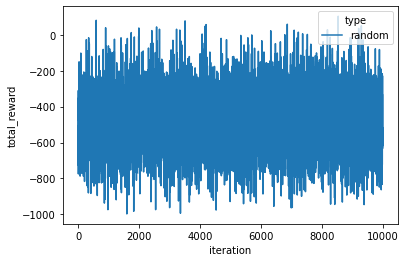

In [2]:
results = pd.read_parquet('results.parquet.gzip')
sns.lineplot(data=results, x="iteration", y="total_reward",hue='type')

In [5]:
results.head()

,iteration,total_reward,type,action_space_
0,1,-510.968857,random,3
1,2,-546.147672,random,3
2,3,-560.761903,random,3
3,4,-640.366200,random,3
4,5,-448.159985,random,3
